Author: Aniket Tekawade

# Explore the generators module in porespy.  

https://porespy.readthedocs.io/en/master/modules/generators.html  

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ray_utils as ray
from ct_segnet.data_utils.data_io import DataFile
from ct_segnet import viewer
import config_7BM as config

# import ipywidgets.interact class, this class will represent a slide bar.
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout
from IPython.display import display
figw = 16


### Determine phantom shape / size  

In [2]:
obj_shape = (200,256,256)
from porespy import generators

### Porous (Blob) Phantom

In [3]:
vol = generators.blobs(shape=obj_shape, porosity=0.5, blobiness=0.5).astype(np.uint8)
# vol = vol + generators.blobs(shape=obj_shape, porosity=0.1, blobiness=3).astype(np.uint8)

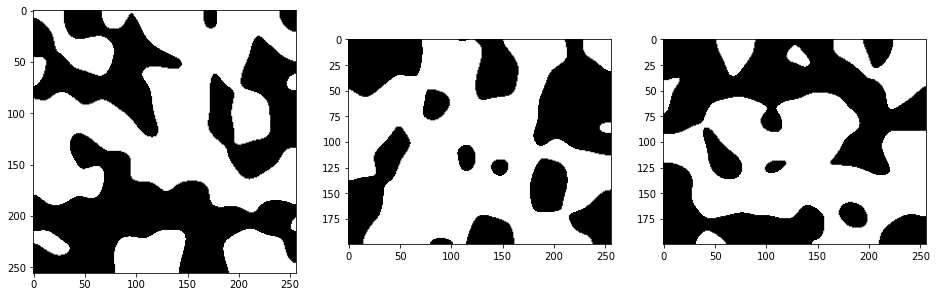

In [4]:
fig, ax = plt.subplots(1,3, figsize = (figw,figw/3))
h = viewer.view_midplanes(vol, ax = ax)

### Bundle of Tubes  

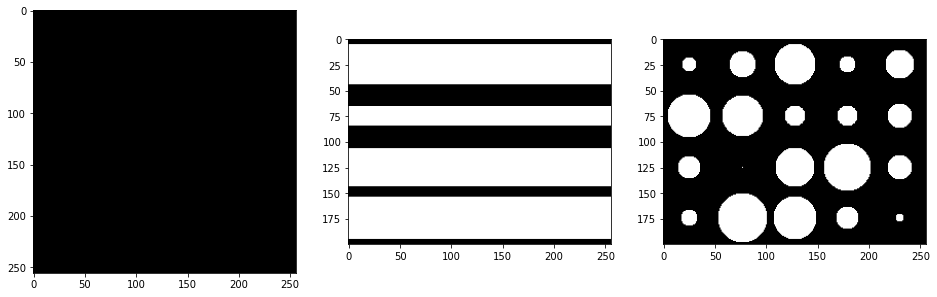

In [5]:
vol = generators.bundle_of_tubes(shape = obj_shape, spacing = 50)
fig, ax = plt.subplots(1,3, figsize = (figw,figw/3))
h = viewer.view_midplanes(vol, ax = ax)

### Overlapping Cylinders (Fibrous Mat)  

2000it [00:08, 227.33it/s]                          


(200, 256, 256)


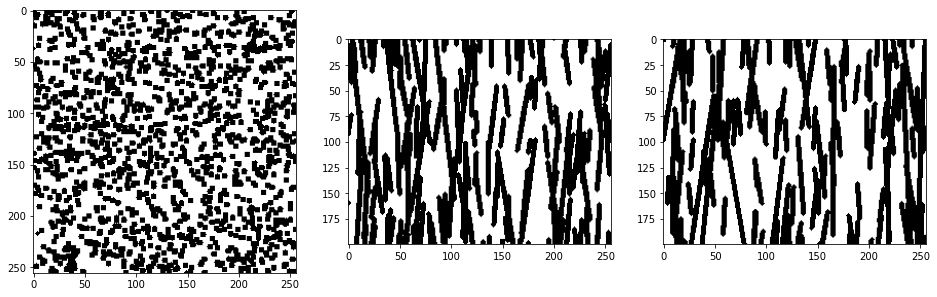

In [6]:
vol = generators.cylinders(shape = obj_shape, radius = 3, \
                           ncylinders=2000, \
                           theta_max = 10, \
                           phi_max = 10, \
                           length = None)
fig, ax = plt.subplots(1,3, figsize = (figw,figw/3))
h = viewer.view_midplanes(vol, ax = ax)
print(vol.shape)

### Lattice Spheres  

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
lattice_spheres: Generating bcc lattice


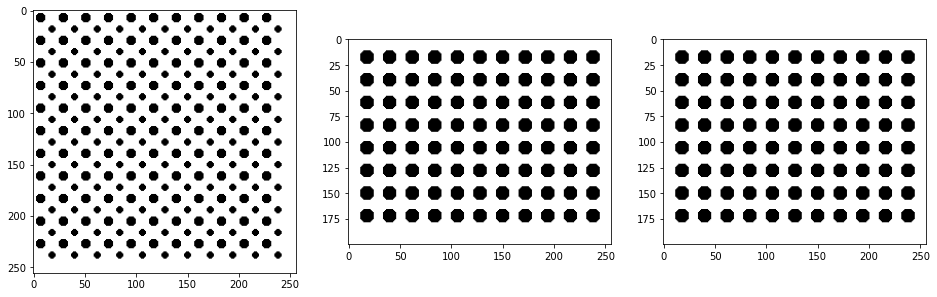

In [7]:
vol = generators.lattice_spheres(shape = obj_shape, \
                                 radius = 7,\
                                 offset=3, \
                                 lattice = 'bcc')
fig, ax = plt.subplots(1,3, figsize = (figw,figw/3))
h = viewer.view_midplanes(vol, ax = ax)

### Overlapping Spheres  

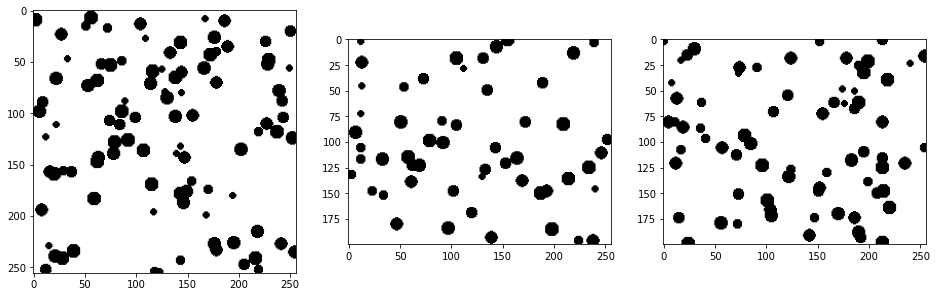

In [8]:
vol = generators.overlapping_spheres(shape = obj_shape, \
                                 radius = 7,\
                                 porosity = 0.9,\
                                 iter_max = 10,\
                                     tol = 0.01)
fig, ax = plt.subplots(1,3, figsize = (figw,figw/3))
h = viewer.view_midplanes(vol, ax = ax)

### Polydisperse Spheres  

In [9]:
from scipy import stats

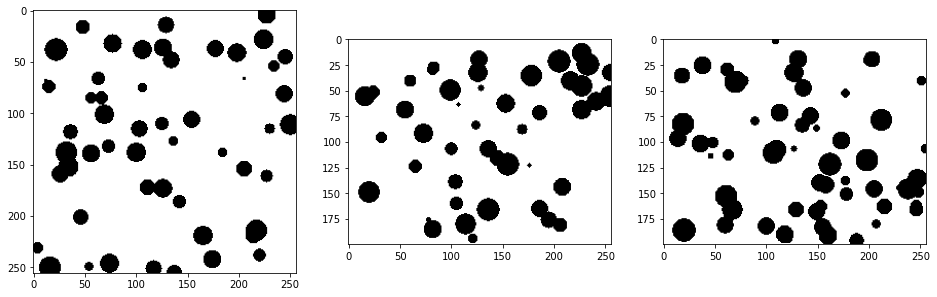

In [10]:
dist = stats.uniform(loc = 8, scale = 4)
vol = generators.polydisperse_spheres(shape = obj_shape, \
                                 porosity = 0.9,\
                                 dist = dist, \
                                      nbins = 7)
fig, ax = plt.subplots(1,3, figsize = (figw,figw/3))
h = viewer.view_midplanes(vol, ax = ax)

### Sphere or disk packing with Random Sequential Addition  

--------------------------------------------------------------------------------
RSA: Adding spheres of size 50
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Regenerating free_sites after 13 iterations
Regenerating free_sites after 17 iterations
Number of spheres inserted: 18
Final volume fraction: 0.4053299713134766


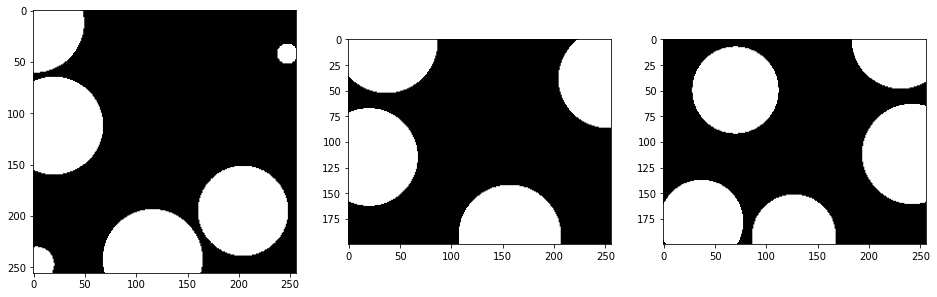

In [11]:
vol = generators.RSA(np.zeros(obj_shape), \
                     radius = 50, \
                     volume_fraction=0.7, \
                     mode = 'extended')
fig, ax = plt.subplots(1,3, figsize = (figw,figw/3))
h = viewer.view_midplanes(vol, ax = ax)

### Voronoi Edges  

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
voronoi_edges: Generating 25 cells


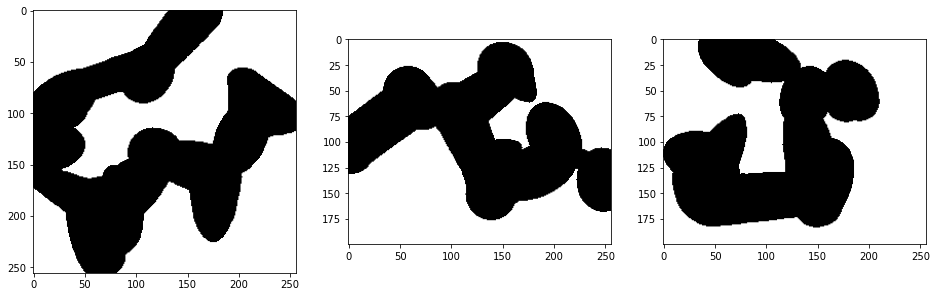

In [12]:
vol = generators.voronoi_edges(shape = obj_shape, \
                               radius = 25, \
                               ncells = 25, \
                               flat_faces = False)
fig, ax = plt.subplots(1,3, figsize = (figw,figw/3))
h = viewer.view_midplanes(vol, ax = ax)

### Custom material with inclusions  

For the blob generator, the value of porosity -> 1 means there are no pores. Porosity -> 0 means it is mostly pores. The more contiguous the pore phase becomes. In the limit of high blobiness and low porosity, you get a material with inclusions (higher label value is the inclusions).  

In [13]:
from utils import make_voids_inclusions

In [14]:
vol_f = make_voids_inclusions(obj_shape, void_size = 0.2, \
                              void_numerosity=0.5, \
                              inclusion_size=0.10, \
                              inclusion_numerosity=5.0)

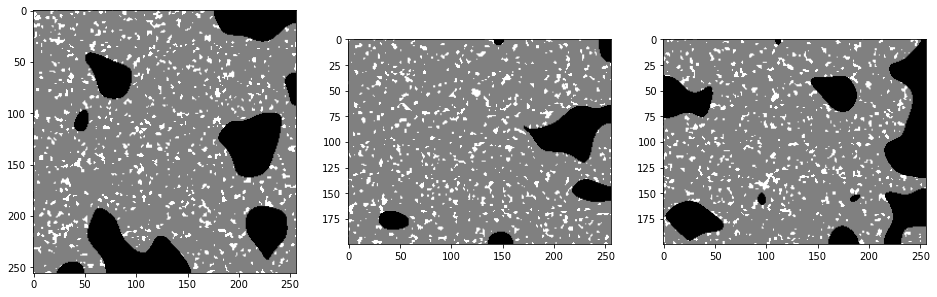

In [15]:
fig, ax = plt.subplots(1,3, figsize = (figw,figw/3))
h = viewer.view_midplanes(vol_f, ax = ax)